In [1]:
!pip install torch torchvision   #torch==2.* torchvision~=0.19
!pip install matplotlib pandas tqdm==4.67.1   #pandas==2.2.3    jupyter
!pip install perceval-quandela #!pip install perceval-quandela==0.12.0  0.11.2
!pip install hyperopt   # Only if you're using TPE
!pip install sympy
!pip install python-decouple

ERROR: Invalid requirement: '#torch==2.*': Expected package name at the start of dependency specifier
    #torch==2.*
    ^
ERROR: Invalid requirement: '#pandas==2.2.3': Expected package name at the start of dependency specifier
    #pandas==2.2.3
    ^
ERROR: Invalid requirement: '#!pip': Expected package name at the start of dependency specifier
    #!pip
    ^
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [13]:
import perceval as pcvl
import numpy as np


In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of boson_sampler failed: Traceback (most recent call last):
  File "C:\Users\nicol\anaconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\nicol\anaconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Users\nicol\anaconda3\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "C:\Users\nicol\Downloads\HybridAIQuantum-Challenge_2025_Team_naples-quantum2pi-knights\src\boson_sampler.py", line 227
    ' 

In [83]:
import sys  
sys.path.insert(1, "Users\nicol\Downloads\HybridAIQuantum-Challenge_2025_Team_naples-quantum2pi-knights")

from boson_sampler import *

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nicol\AppData\Local\Temp\ipykernel_39580\1921144927.py:2: SyntaxWarning: invalid escape sequence '\D'
  sys.path.insert(1, "Users\nicol\Downloads\HybridAIQuantum-Challenge_2025_Team_naples-quantum2pi-knights")


In [84]:
m=5
n=2

Builder="Rectangular"

Filter_A=np.array([[i+j*6 for i in range(0,5)] for j in range(0,6)])

Filter_B=np.random.rand(6,5)

Builders={"pdf":PdfInterferometerBuilder(),"Triangular":TriangularInterferometerBuilder(),"Rectangular":RectangularInterferometerBuilder(),
          "base":BaseInterferometerBuilder(),"convolutional":ConvolutionalInterferometerBuilder(Filter_A,Filter_B)}

bs=VariationalBosonSampler(
            m=m,
            n=n,
            postselect=2,
            backend=None,
            session=None,
            builder=Builders[Builder],
            cache_enabled=None,
            cache_directory=None
        )

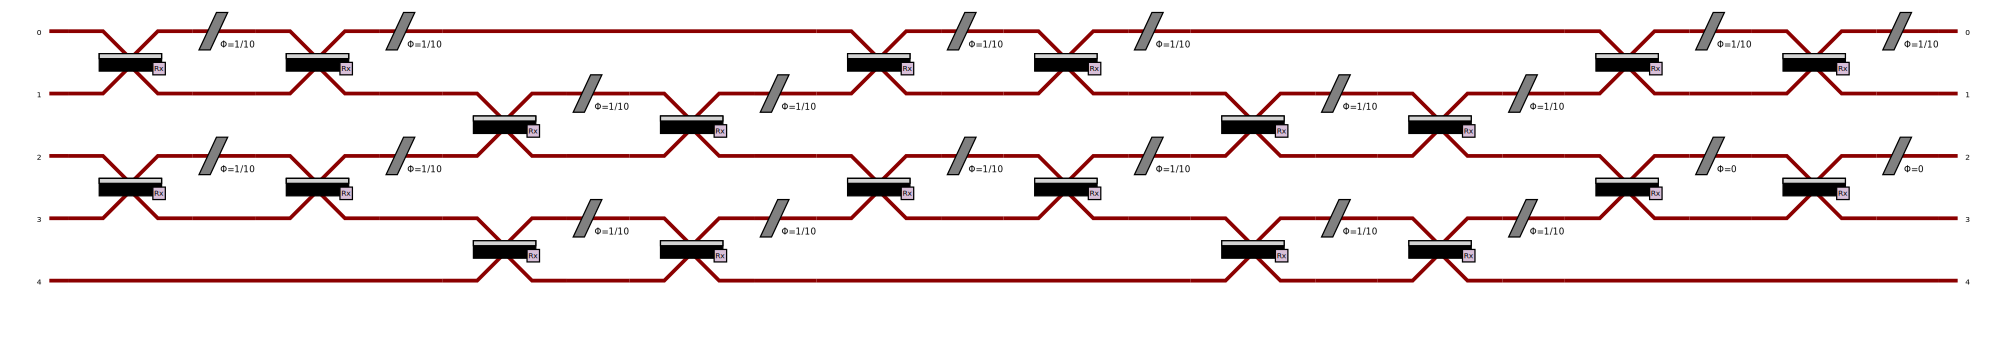

In [85]:
pcvl.pdisplay(bs.create_circuit())

In [86]:
m=5
n=2

Builder="Triangular"

Filter_A=np.array([[i+j*6 for i in range(0,5)] for j in range(0,6)])

Filter_B=np.random.rand(6,5)

Builders={"pdf":PdfInterferometerBuilder(),"Triangular":TriangularInterferometerBuilder(),"Rectangular":RectangularInterferometerBuilder(),
          "base":BaseInterferometerBuilder(),"convolutional":ConvolutionalInterferometerBuilder(Filter_A,Filter_B)}

bs=VariationalBosonSampler(
            m=m,
            n=n,
            postselect=2,
            backend=None,
            session=None,
            builder=Builders[Builder],
            cache_enabled=None,
            cache_directory=None
        )

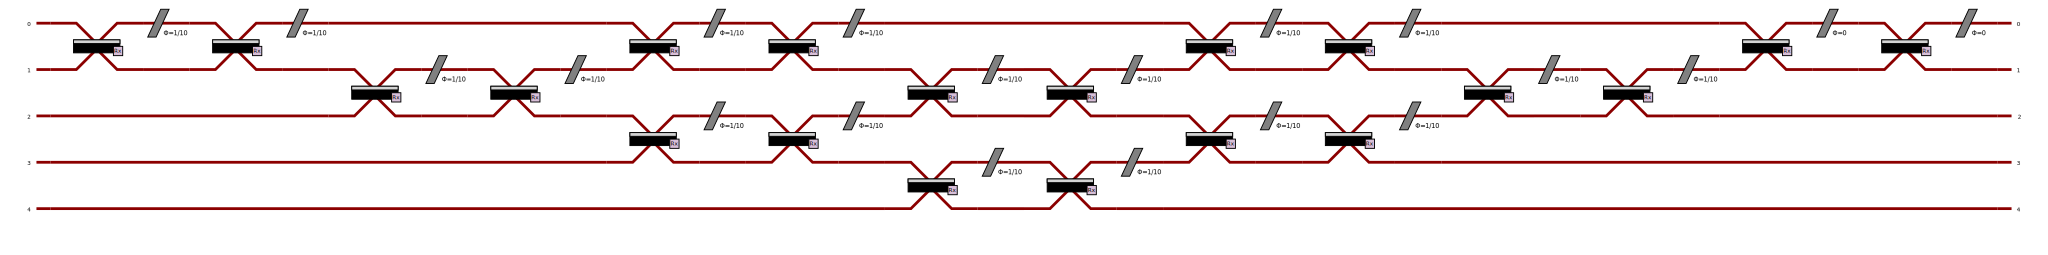

In [87]:
pcvl.pdisplay(bs.create_circuit())

In [78]:
m=5
n=2

Builder="convolutional"

Filter_A=np.array([[i+j*6 for i in range(0,5)] for j in range(0,6)])

Filter_B=np.random.rand(6,5)

Builders={"pdf":PdfInterferometerBuilder(),"Triangular":TriangularInterferometerBuilder(),"Rectangular":RectangularInterferometerBuilder(),
          "base":BaseInterferometerBuilder(),"convolutional":ConvolutionalInterferometerBuilder(Filter_A,Filter_B)}

bs=VariationalBosonSampler(
            m=m,
            n=n,
            postselect=2,
            backend=None,
            session=None,
            builder=Builders[Builder],
            cache_enabled=None,
            cache_directory=None
        )

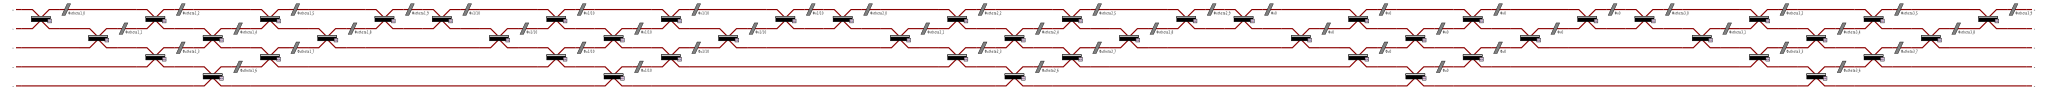

In [79]:
pcvl.pdisplay(bs.create_circuit())

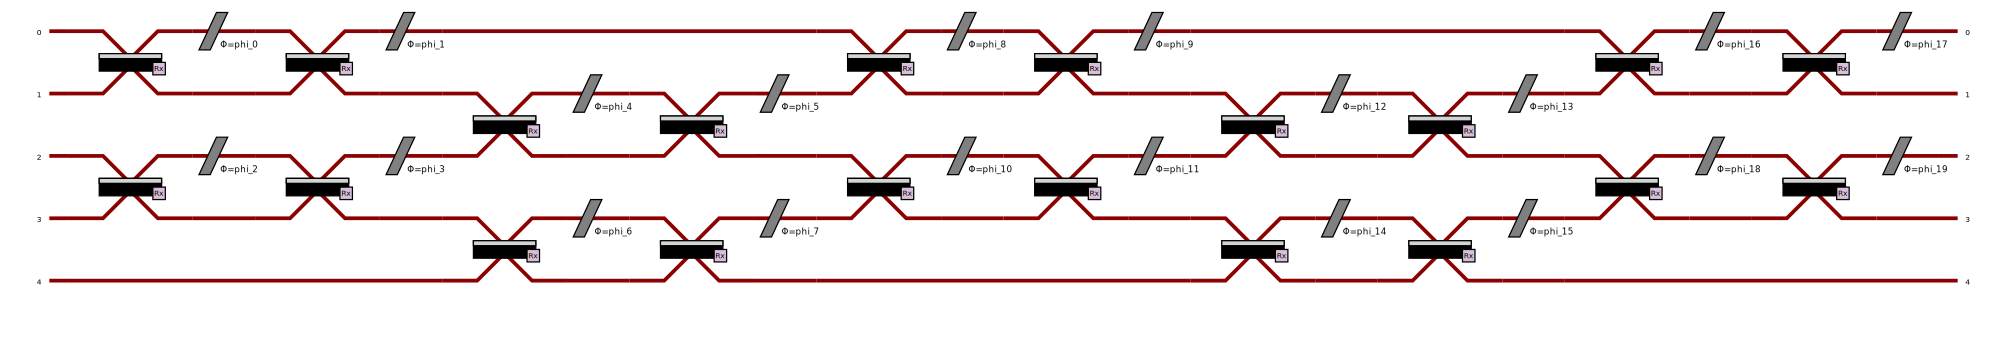

In [82]:
parameters = [p for i in range(m * (m - 1) // 2)
                           for p in [pcvl.P(f"phi_{2 * i}"), pcvl.P(f"phi_{2 * i + 1}")]]

bs=pcvl.GenericInterferometer(m, lambda i: (pcvl.BS()
                                                             .add(0, pcvl.PS(parameters[2 * i]))
                                                             .add(0, pcvl.BS())
                                                             .add(0, pcvl.PS(parameters[2 * i + 1]))
                                                             )
                                          )

pcvl.pdisplay(bs)